In [1]:
import matplotlib.pyplot as plt
import sys
import os

In [2]:

# Add the parent directory to the path to import src as a package
sys.path.insert(0, os.path.abspath('..'))
from src import dataloader
import numpy as np

%matplotlib widget
plot_flag = False

In [4]:
dyad_id = "W030"
lowcut=1.0
highcut=10.0
eeg_filter_type = 'fir' # choose 'fir' or 'iir' for EEG filtering
q=1  # decimation factor
multimodal_data = dataloader.create_multimodal_data(data_base_path = "../data", 
                                                    dyad_id = dyad_id, 
                                                    load_eeg=True, 
                                                    load_et=True, 
                                                    lowcut=lowcut, 
                                                    highcut=highcut, 
                                                    eeg_filter_type=eeg_filter_type, 
                                                    interpolate_et_during_blinks_threshold=0.3,
                                                    median_filter_size=64,
                                                    low_pass_et_order=351,
                                                    et_pos_cutoff=128,
                                                    et_pupil_cutoff=4,
                                                    pupil_model_confidence=0.9,
                                                    decimate_factor=q,
                                                    plot_flag=plot_flag)
q=8
multimodal_data_dec = multimodal_data._decimate_signals(q=q)


Detected events: [{'name': 'Brave', 'start': 387.806640625, 'duration': 59.3310546875}, {'name': 'Peppa', 'start': 248.5107421875, 'duration': 59.6328125}, {'name': 'Incredibles', 'start': 318.3603515625, 'duration': 59.212890625}, {'name': 'Talk_1', 'start': 594.4892578125, 'duration': 181.0556640625}, {'name': 'Talk_2', 'start': 836.7275390625, 'duration': 181.056640625}]
Applying fir filters to EEG data.
Reseting the EEG time to the start of Peppa
ET time range: 241.59s to 461.89s
Events from ET annotations:
[None 'Peppa' 'Incredibles' 'Brave']
Reseting the ET time to the start of Peppa
Processing member: ch, blink column: ET_ch_blinks
Processing member: cg, blink column: ET_cg_blinks
Event Peppa start times are consistent within 0.0 seconds.
Event Incredibles differ in start times by: abs(0.0009765625) seconds.
Event Brave differ in start times by: abs(0.0361328125) seconds.
Events column created based on EEG_events and ET_event columns.
Event structure created based on events colu

In [5]:
multimodal_data.data.columns    

Index(['time_idx', 'ECG_ch', 'ECG_cg', 'IBI_ch', 'IBI_cg', 'EEG_ch_Fp1',
       'EEG_ch_Fp2', 'EEG_ch_F7', 'EEG_ch_F3', 'EEG_ch_Fz', 'EEG_ch_F4',
       'EEG_ch_F8', 'EEG_ch_M1', 'EEG_ch_T3', 'EEG_ch_C3', 'EEG_ch_Cz',
       'EEG_ch_C4', 'EEG_ch_T4', 'EEG_ch_M2', 'EEG_ch_T5', 'EEG_ch_P3',
       'EEG_ch_Pz', 'EEG_ch_P4', 'EEG_ch_T6', 'EEG_ch_O1', 'EEG_ch_O2',
       'EEG_cg_Fp1', 'EEG_cg_Fp2', 'EEG_cg_F7', 'EEG_cg_F3', 'EEG_cg_Fz',
       'EEG_cg_F4', 'EEG_cg_F8', 'EEG_cg_M1', 'EEG_cg_T3', 'EEG_cg_C3',
       'EEG_cg_Cz', 'EEG_cg_C4', 'EEG_cg_T4', 'EEG_cg_M2', 'EEG_cg_T5',
       'EEG_cg_P3', 'EEG_cg_Pz', 'EEG_cg_P4', 'EEG_cg_T6', 'EEG_cg_O1',
       'EEG_cg_O2', 'EEG_events', 'diode', 'ET_event', 'ET_ch_x', 'ET_ch_y',
       'ET_ch_pupil', 'ET_ch_blinks', 'ET_cg_x', 'ET_cg_y', 'ET_cg_pupil',
       'ET_cg_blinks', 'time', 'events'],
      dtype='str')

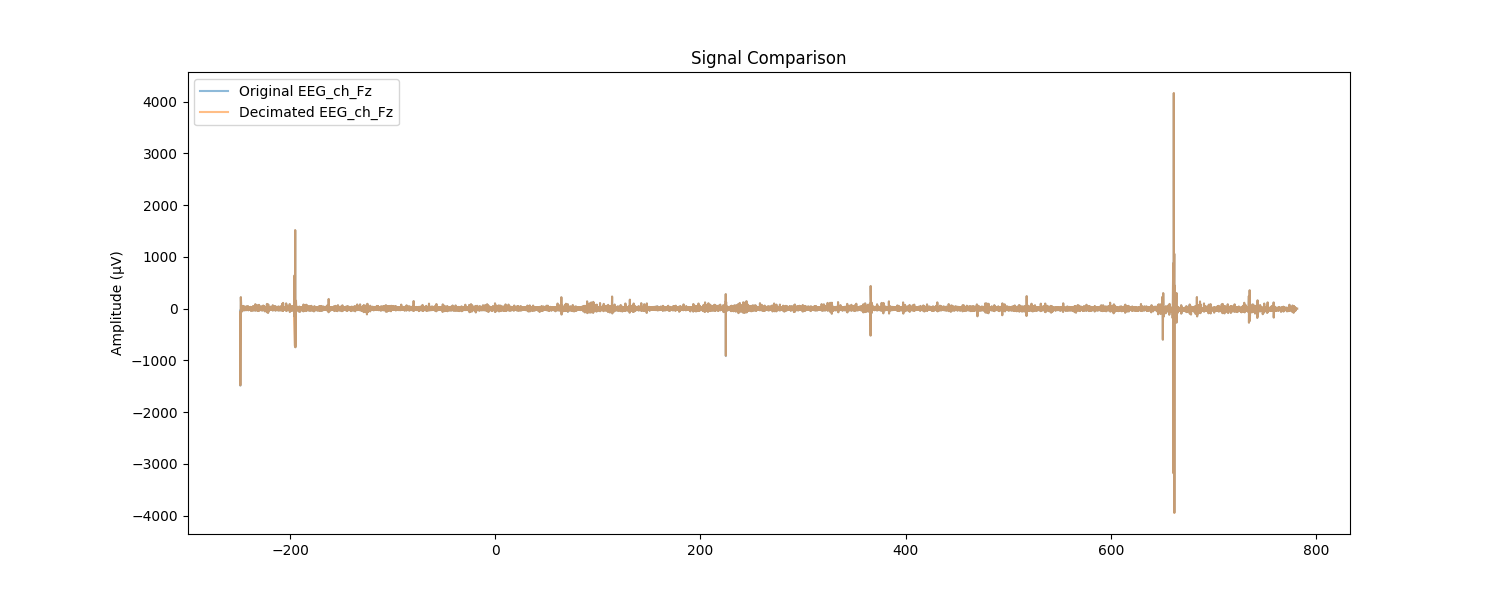

In [6]:
# Plot to compare original and decimated signals
plt.figure(figsize=(15, 6))

time_original = multimodal_data.data['time'].values
col = 'EEG_ch_Fz'  # Example channel
plt.plot(time_original, multimodal_data.data[col], label=f'Original {col}', alpha=0.5)
time_decimated = multimodal_data_dec.data['time'].values
plt.plot(time_decimated, multimodal_data_dec.data[col], label=f'Decimated {col}', alpha=0.5)
plt.title('Signal Comparison')
plt.ylabel('Amplitude (µV)')
plt.legend()
plt.show()